In [86]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import sklearn
import numpy as np
from scipy.stats import lognorm

In [37]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360)
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets
df = pd.concat([X, y], axis=1)
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
# print(df.head(20))
df = df.apply(pd.to_numeric, errors='coerce')
neg = (df == -200).any(axis=1).sum()
print(f" % precent of rows with at least 1 negative value: {neg / len(df) * 100}")
# avg of forward and backward fill
df = df.replace(-200, pd.NA)
df = (df.ffill() + df.bfill()) / 2
print(df.head(20))

 % precent of rows with at least 1 negative value: 91.16169712514694
    CO(GT)  PT08.S1(CO) NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.60       1360.0    150.0      11.9         1046.0    166.0   
1     2.00       1292.0    112.0       9.4          955.0    103.0   
2     2.20       1402.0     88.0       9.0          939.0    131.0   
3     2.20       1376.0     80.0       9.2          948.0    172.0   
4     1.60       1272.0     51.0       6.5          836.0    131.0   
5     1.20       1197.0     38.0       4.7          750.0     89.0   
6     1.20       1185.0     31.0       3.6          690.0     62.0   
7     1.00       1136.0     31.0       3.3          672.0     62.0   
8     0.90       1094.0     24.0       2.3          609.0     45.0   
9     0.60       1010.0     19.0       1.7          561.0     33.0   
10    0.65       1011.0     14.0       1.3          527.0     21.0   
11    0.70       1066.0      8.0       1.1          512.0     16.0   
12    0.70       1052

/var/folders/h3/srj0ks150b74jtpr2zl0w3d40000gn/T/ipykernel_85272/3123187785.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df.ffill() + df.bfill()) / 2


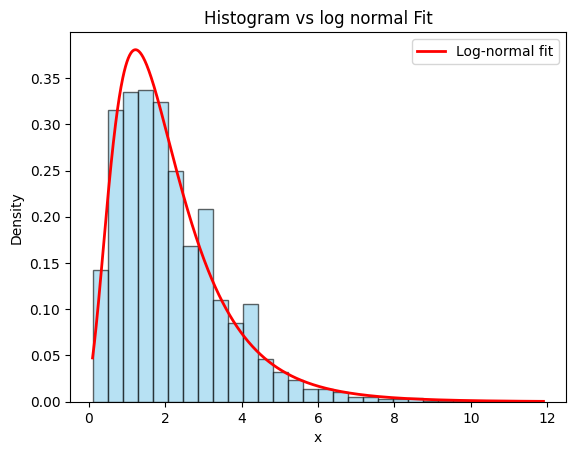

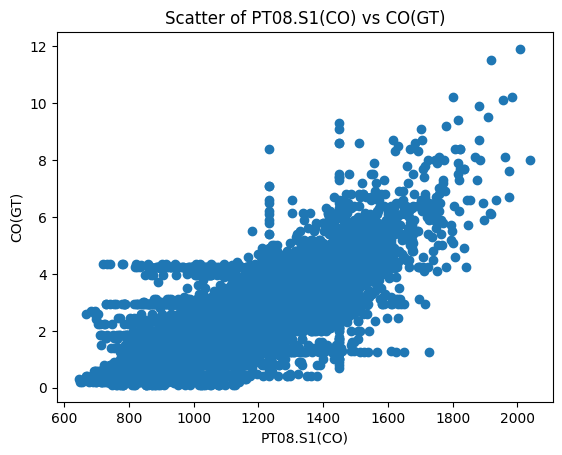

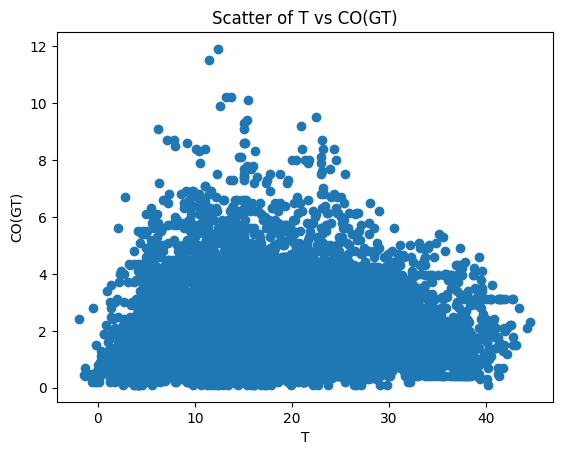

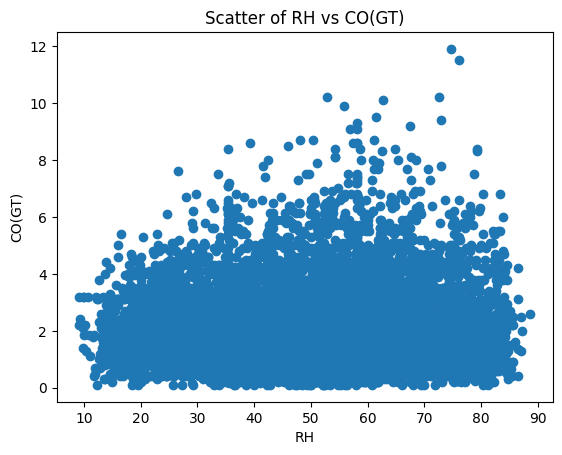

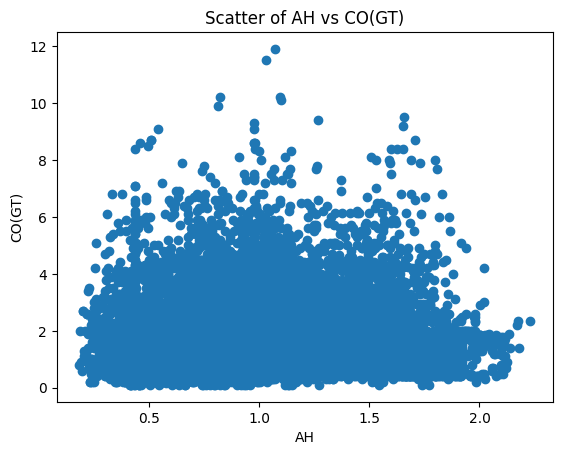

In [92]:
# plots
x = 'PT08.S1(CO)'
y = 'CO(GT)'

shape, loc, scale = lognorm.fit(df[y])
# Histogram
plt.hist(df[y], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
# Overlay log-normal PDF
x = np.linspace(df[y].min(), df[y].max(), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r', lw=2, label='Log-normal fit')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram vs log normal Fit') # CO(GT) has log normal distribution <=> log(CO) has normal dist
plt.legend()
plt.show()

x = 'PT08.S1(CO)'
plt.scatter(np.power(df[x], 1), np.power(df[y], 1)) # strong linear relationship (i think slightly curved)
# plt.scatter(np.power((df[x] - df[x].mean())/df[x].std(), 1), np.power((df[x] - df[x].mean())/df[x].std(), 1))
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter of {x} vs {y}')
plt.show()

x = 'T'
plt.scatter(np.power(df[x], 1), np.power(df[y], 1))
# plt.scatter(np.power((df[x] - df[x].mean())/df[x].std(), 1), np.power((df[x] - df[x].mean())/df[x].std(), 1))
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter of {x} vs {y}')
plt.show()

x = 'RH'
plt.scatter(np.power(df[x], 1), np.power(df[y], 1))
# plt.scatter(np.power((df[x] - df[x].mean())/df[x].std(), 1), np.power((df[x] - df[x].mean())/df[x].std(), 1))
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter of {x} vs {y}')
plt.show()

x = 'AH'
plt.scatter(np.power(df[x], 1), np.power(df[y], 1))
# plt.scatter(np.power((df[x] - df[x].mean())/df[x].std(), 1), np.power((df[x] - df[x].mean())/df[x].std(), 1))
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter of {x} vs {y}')
plt.show()